# Assignment Answers

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Path of datasets
playstore = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
flight = 'Datasets/flight_price.xlsx'

# 1.

In [11]:
# Loading dataset
df = pd.read_excel(flight)

In [5]:
# Checking dimensions
df.shape

(10683, 11)

The flight price prediction dataset have 10683 rows and 11 columns.

# 2.

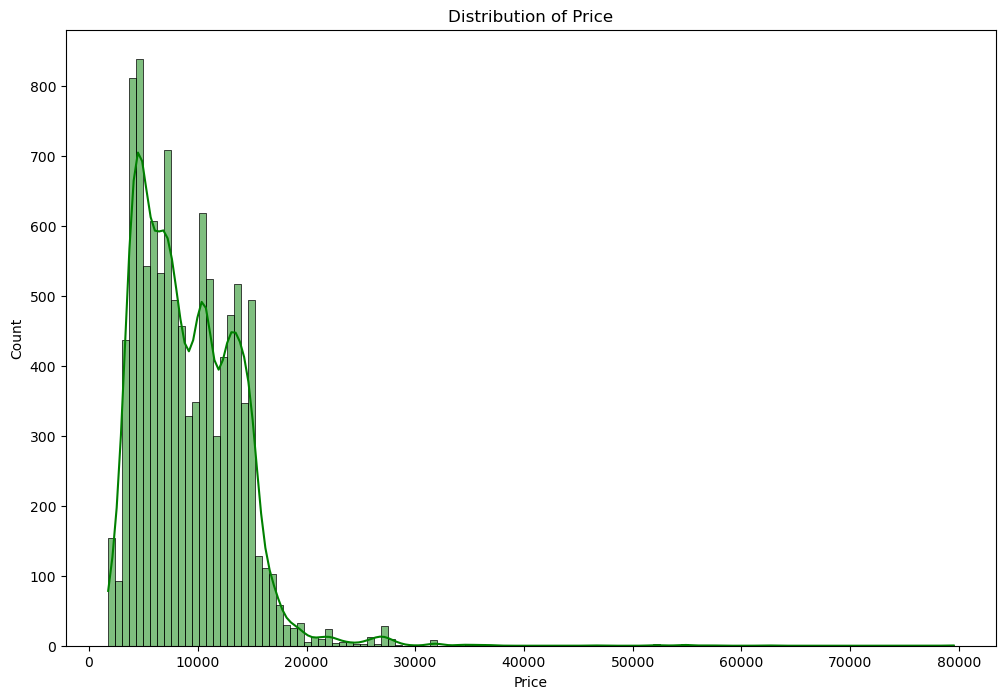

In [201]:
# Plotting flight price data
plt.figure(figsize=(12,8))
plt.title("Distribution of Price")
sns.histplot(x=df['Price'],kde=True,color='g')
plt.show()

From the above obtained histogram, we can observe that the distribution of flight prices in the dataset is non-normal that is __right skewed__.

# 3.

In [202]:
# Checking range of prices in the dataset
ranges = [df.Price.min(),df.Price.max()]

# Output
print("Range of price:",ranges)
print("Minimum value of price: ",ranges[0])
print("Maximum value of price: ",ranges[1])

Range of price: [1759, 79512]
Minimum value of price:  1759
Maximum value of price:  79512


# 4.

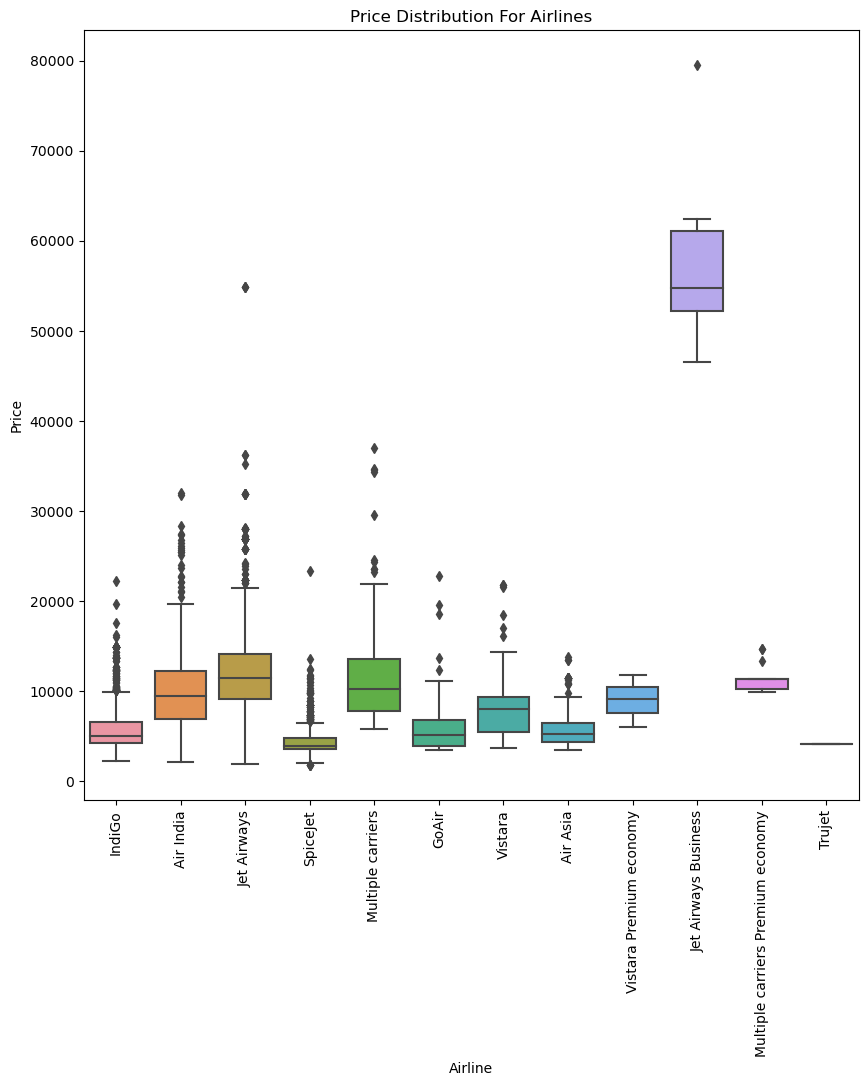

In [203]:
# Creating boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x='Airline',y='Price',data=df)
plt.title("Price Distribution For Airlines")
plt.xticks(rotation=90)
plt.show()

From the above diagram, we can observe that the Jet Airways Business have highest average price among all airlines.<br>
While, the average price of Spicejet airline is low among all.<br>
And the average price of rest of the airlines are more or less same i.e., less than or equal to 10000.

# 5.

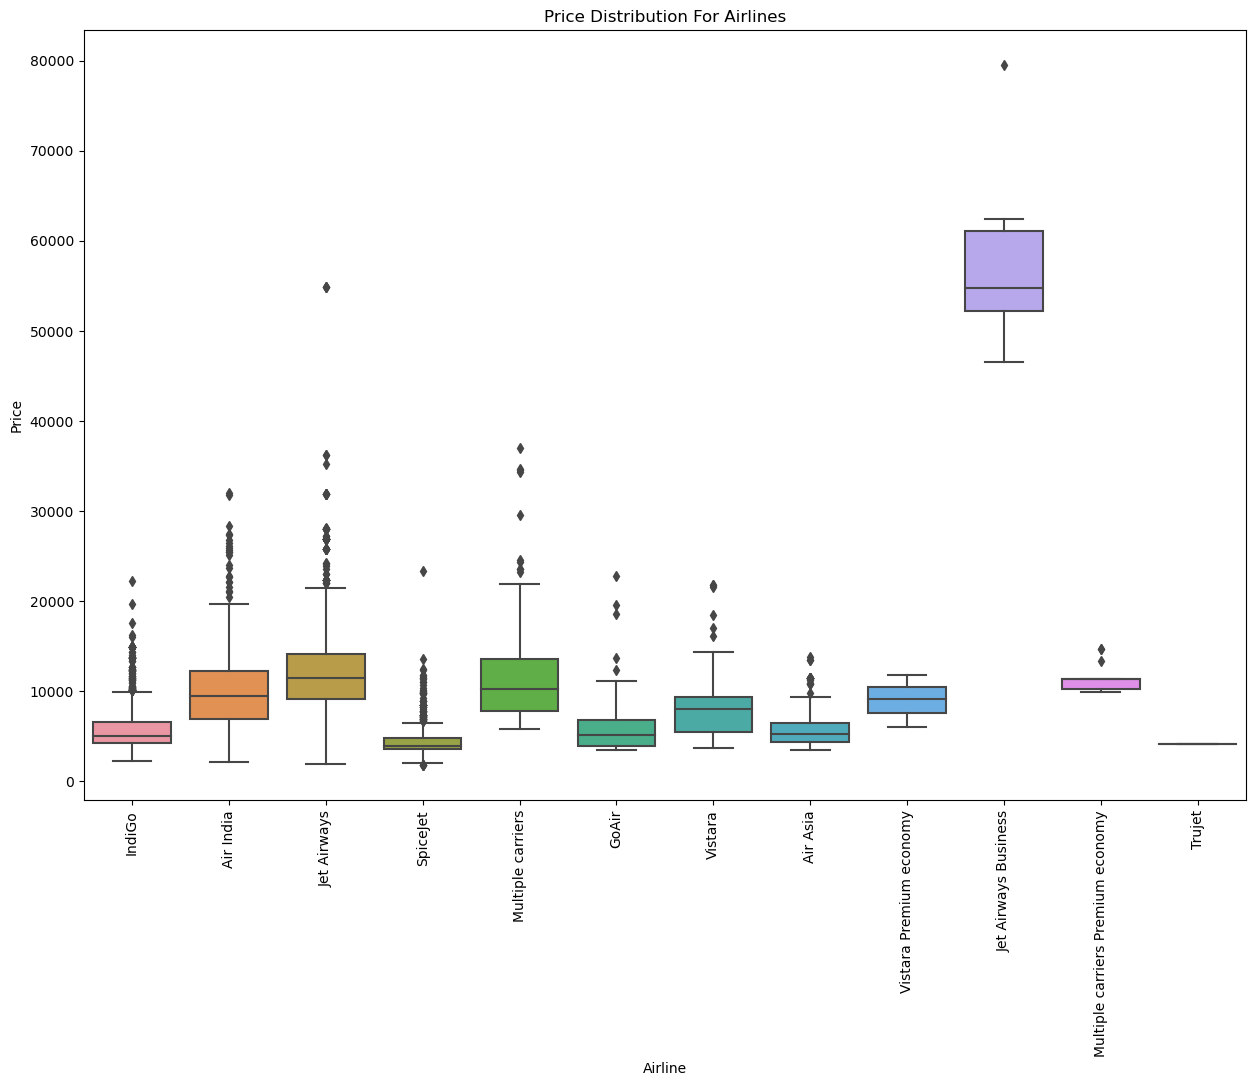

In [204]:
# Creating boxplot
plt.figure(figsize=(15,10))
sns.boxplot(x='Airline',y='Price',data=df)
plt.title("Price Distribution For Airlines")
plt.xticks(rotation=90)
plt.show()

When we compare prices for each airlines present in the dataset using boxplot as show above in the diagram, we observe that almost every airline has ouliers in their prices except for one which is Vistara Premium Economy Airline. The presence of outliers in the dataset can effect us in analysis in the following way:<br><br>
- It can lead to deviate the price of airline from the general distribution of prices.
- It may lead for false prediction of prices for each airline.

# 6.

In [12]:
# Function to classify month as season
def month_to_season(m):
    if(3<=m<=4):
        return "Spring Season"
    elif(5<=m<=6):
        return "Summer Season"
    elif(7<=m<=8):
        return "Monsoon Season"
    elif(9<=m<=10):
        return "Autumn Season"
    elif(11<=m<=12):
        return "Pre-winter Season"
    else:
        return "Winter Season"

In [13]:
# Let's add a column for a month which will let us to know about the season
df["Date"] = df.Date_of_Journey.str.split('/').str[0].astype(int)
df["Month"] = df.Date_of_Journey.str.split('/').str[1].astype(int)
df["Year"] = df.Date_of_Journey.str.split('/').str[2].astype(int)

# Column for season
df["Season"] = df["Month"].apply(lambda m : month_to_season(m))

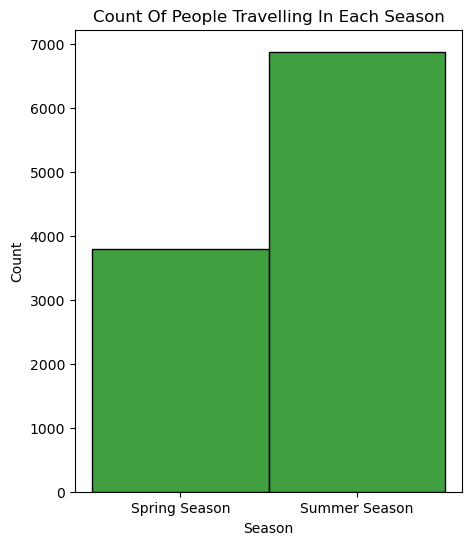

In [207]:
# Plotting Data
plt.figure(figsize=(5,6))
plt.title("Count Of People Travelling In Each Season")
sns.histplot(x=df.Season,bins=2,color="g")
plt.show()

To analyze the peak season, I will perform followig steps:<br><br>
Step-1: At first, I will create a column showing month of travel from the Date_of_Journey column as season are based on month.<br>
Step-2: Then I will create another column for represent season.<br>
Step-3: Finally using a histogram, I will tell which season has recorded many travel.<br><br>
I will use histogram and pie chart when it will be needed to present the findings to someone as it will let understand the distribution of count easily.

# 7.

##### Part-1:<br><br>
To analyze the trends in flight price, I will take following features.<br><br>
1. Airline  : To check if different airline has different price trendings.
2. Duration : To know if the price of flight changes with duration.
3. Month    : To know if the price of flight changes with month to travel in.
4. Season   : To know if the price of flight changes with season to travel in.
5. Stops    : To know if the price of flights changes with total stops it take during its travel.
<br><br>
##### Part-2:<br><br>
I will use line chart to show trendings of flight prices with respect to different features.

In [14]:
# Cleaning Data
# Replacing non-stop wit 0 stop
df['Total_Stops']=df.Total_Stops.apply(lambda x : '0 stop' if(x=='non-stop') else x)
# Removing missing record
df.dropna(inplace=True)

In [15]:
# Feature Engineering

# Function to categorize time
def categorise_time(x):
    if(x<=1):
        return "Less than 1 hr."
    elif(1<x<=2):
        return "Between 1-2 hr."
    elif(2<x<=3):
        return "Between 2-3 hr."
    elif(3<x<=4):
        return "Between 3-4 hr."
    elif(4<x<=5):
        return "Between 4-5 hr."
    elif(5<x<=6):
        return "Between 5-6 hr."
    elif(6<x<=7):
        return "Between 6-7 hr."
    elif(7<x<=8):
        return "Between 7-8 hr."
    else:
        return "Greater than 8 hr."
    
# creating another column to represent integer value of total stops
df["Stops"] = df.Total_Stops.str.split(" ").str[0].astype(int)
df["Hours"] = df.Duration.str.split(" ").str[0].apply(lambda x : x[0]).astype(int)
df["Minutes"] = df.Duration.str.split(" ").str[1].fillna('0')
df["Minutes"] = df.Minutes.apply(lambda x : x[0]).astype(int)
df["Duration_Hours"] = df["Hours"]+df["Minutes"]/60
df["Duratio Category"] = df.Duration_Hours.apply(lambda x : categorise_time(x))

In [ ]:
# Visualizing Data
columns = ['Airline','Duratio Category','Month','Season','Stops']


plt.figure(figsize=(15,15))
plt.suptitle("Trends in price for different features")
i=0
for col in columns:
    i+=1
    plt.subplot(3,2,i)
    sns.lineplot(data=df, x=col, y="Price",color="orange")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.xticks(rotation=90)
    plt.tight_layout()


# 8.

##### Part-1:<br><br>
To analyze the trends in flight price, I will take following features.<br><br>
1. Source and Destination : Price of flights are highly dependent on starting and ending place of a journey.
2. Duration : To know if the price of flight changes with duration.
3. Month    : To know if the price of flight changes with month to travel in.
4. Season   : To know if the price of flight changes with season to travel in.
5. Stops    : To know if the price of flights changes with total stops it take during its travel.
<br><br>
##### Part-2:<br><br>
I will use scatter plot to show relationships of these factors with respect to flight prices.

In [ ]:
# Visualizing Data
columns = ['Source','Destination','Duratio Category','Month','Season','Stops']


plt.figure(figsize=(15,15))
i=0
for col in columns:
    i+=1
    plt.subplot(3,2,i)
    sns.scatterplot(data=df, x=col, y="Price",color="orange")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.xticks(rotation=90)
    plt.tight_layout()


# 9.

In [126]:
# Loading Dataset
df = pd.read_csv(playstore)

# Checking Dimensions
df.shape

(10841, 13)

It has 10841 rows and 13 columns

# 10.

In [127]:
# Cleaning Data
# Removing unspecified value from category feature
df["Category"] = df.Category.apply(lambda x : 0 if(x=='1.9') else x)
df_new = df[~(df.Category == 0)]

# Removing all duplicates value
df_new.drop_duplicates(inplace=True)

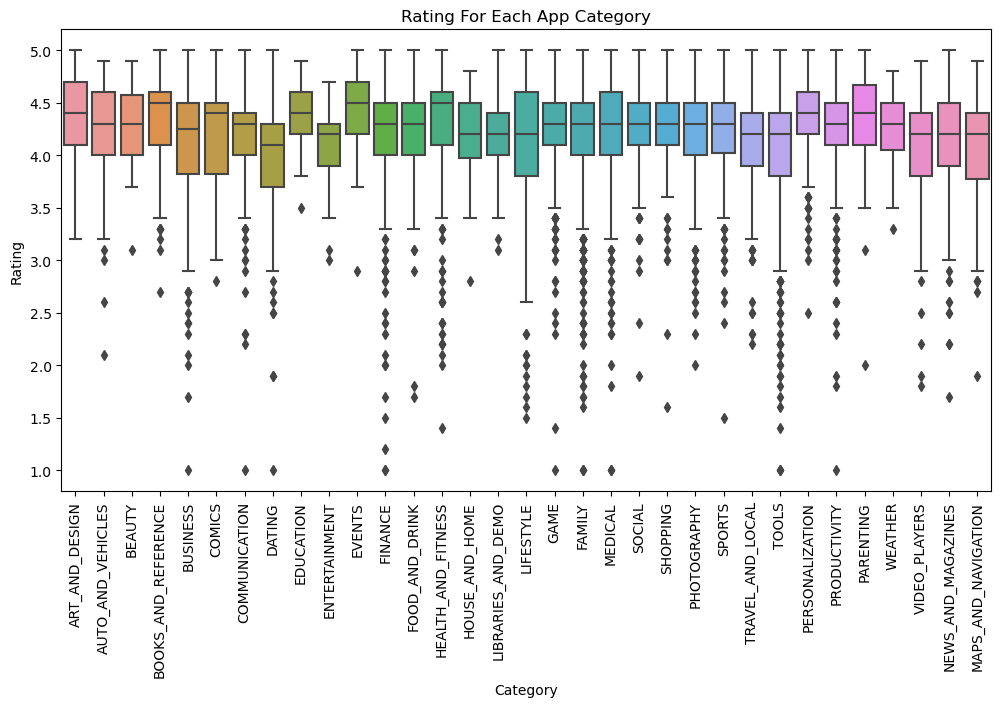

In [128]:
# Creating boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Category',y='Rating',data=df_new)
plt.title("Rating For Each App Category")
plt.xticks(rotation=90)
plt.show()

From the above diagram, we can observe that almost every category has rating of more than or equal to 4.0 and less than 4.5.<br>
Except for category like Health and Fitness, and Events, have ratings more than or equal to 4.5

# 11.

In [129]:
# Checking for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From the above result, we can observe the following things:<br>
- Rating feature have 1465 missing values
- Type feature have 1 missing values
- Current Ver feature have 8 missing values
- Android Ver feature have 2 missing values
<br><br>
Presence of missing values can induce biasness in the result for further prediction. 

# 12.

In [130]:
# Function to change the size from million to thousands
def change_size(x):
    if(x[-1]=='k'):
        return float(x[:len(x)-1])
    if(x[-1]=='M'):
        return float(x[:len(x)-1])*10

df_new = df[~(df["Size"]=="Varies with device")]
df_new["Size"] = df_new.Size.apply(lambda x : change_size(x))


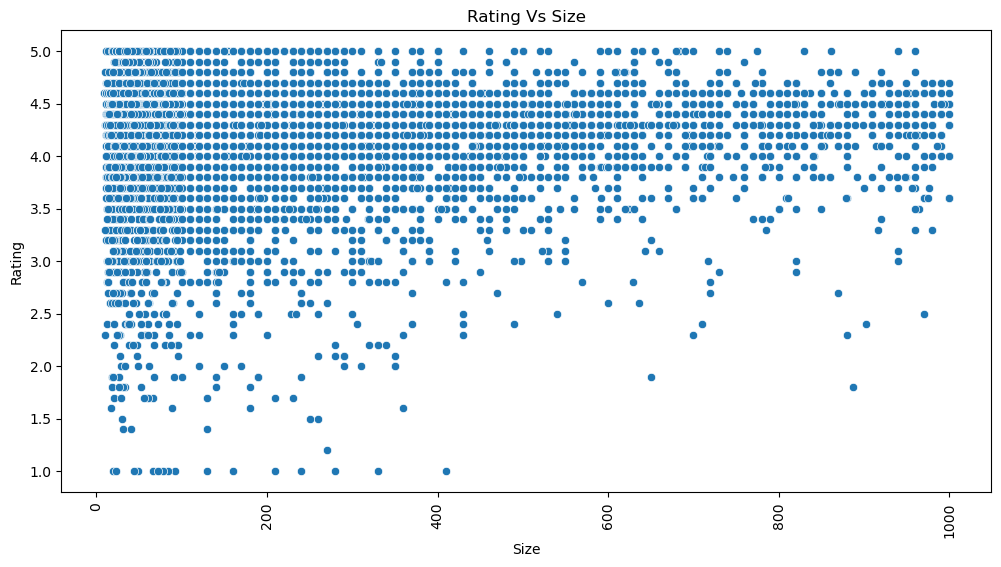

In [131]:
# Creating line plot
plt.figure(figsize=(12,6))
sns.scatterplot(x="Size",y="Rating",data=df_new)
plt.title("Rating Vs Size")
plt.xticks(rotation=90)
plt.show()

From the above diagram, we acan observe that, for most of the app of size more than 800K, their rating is greater than or equal to 4.0

# 13.

In [132]:
# Function to change the price to float type
def change_price(x):
    if(x[0]=='$'):
        return float(x[1:])
    else:
        return float(x)

df_new = df[~(df["Price"]=="Everyone")]
df_new["Price"] = df_new.Price.apply(lambda x : change_price(x))


In [133]:
# Grouping data based on category to calculate average price
df_group = df_new.groupby(['Category'])
df_group.get_group('ART_AND_DESIGN').mean()

Rating      4.358065e+00
Reviews    2.461044e+222
Price       9.184615e-02
dtype: float64

In [134]:
app_type =['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
prices = []
for typ in app_type:
    prices.append(df_group.get_group(typ).mean()['Price'])

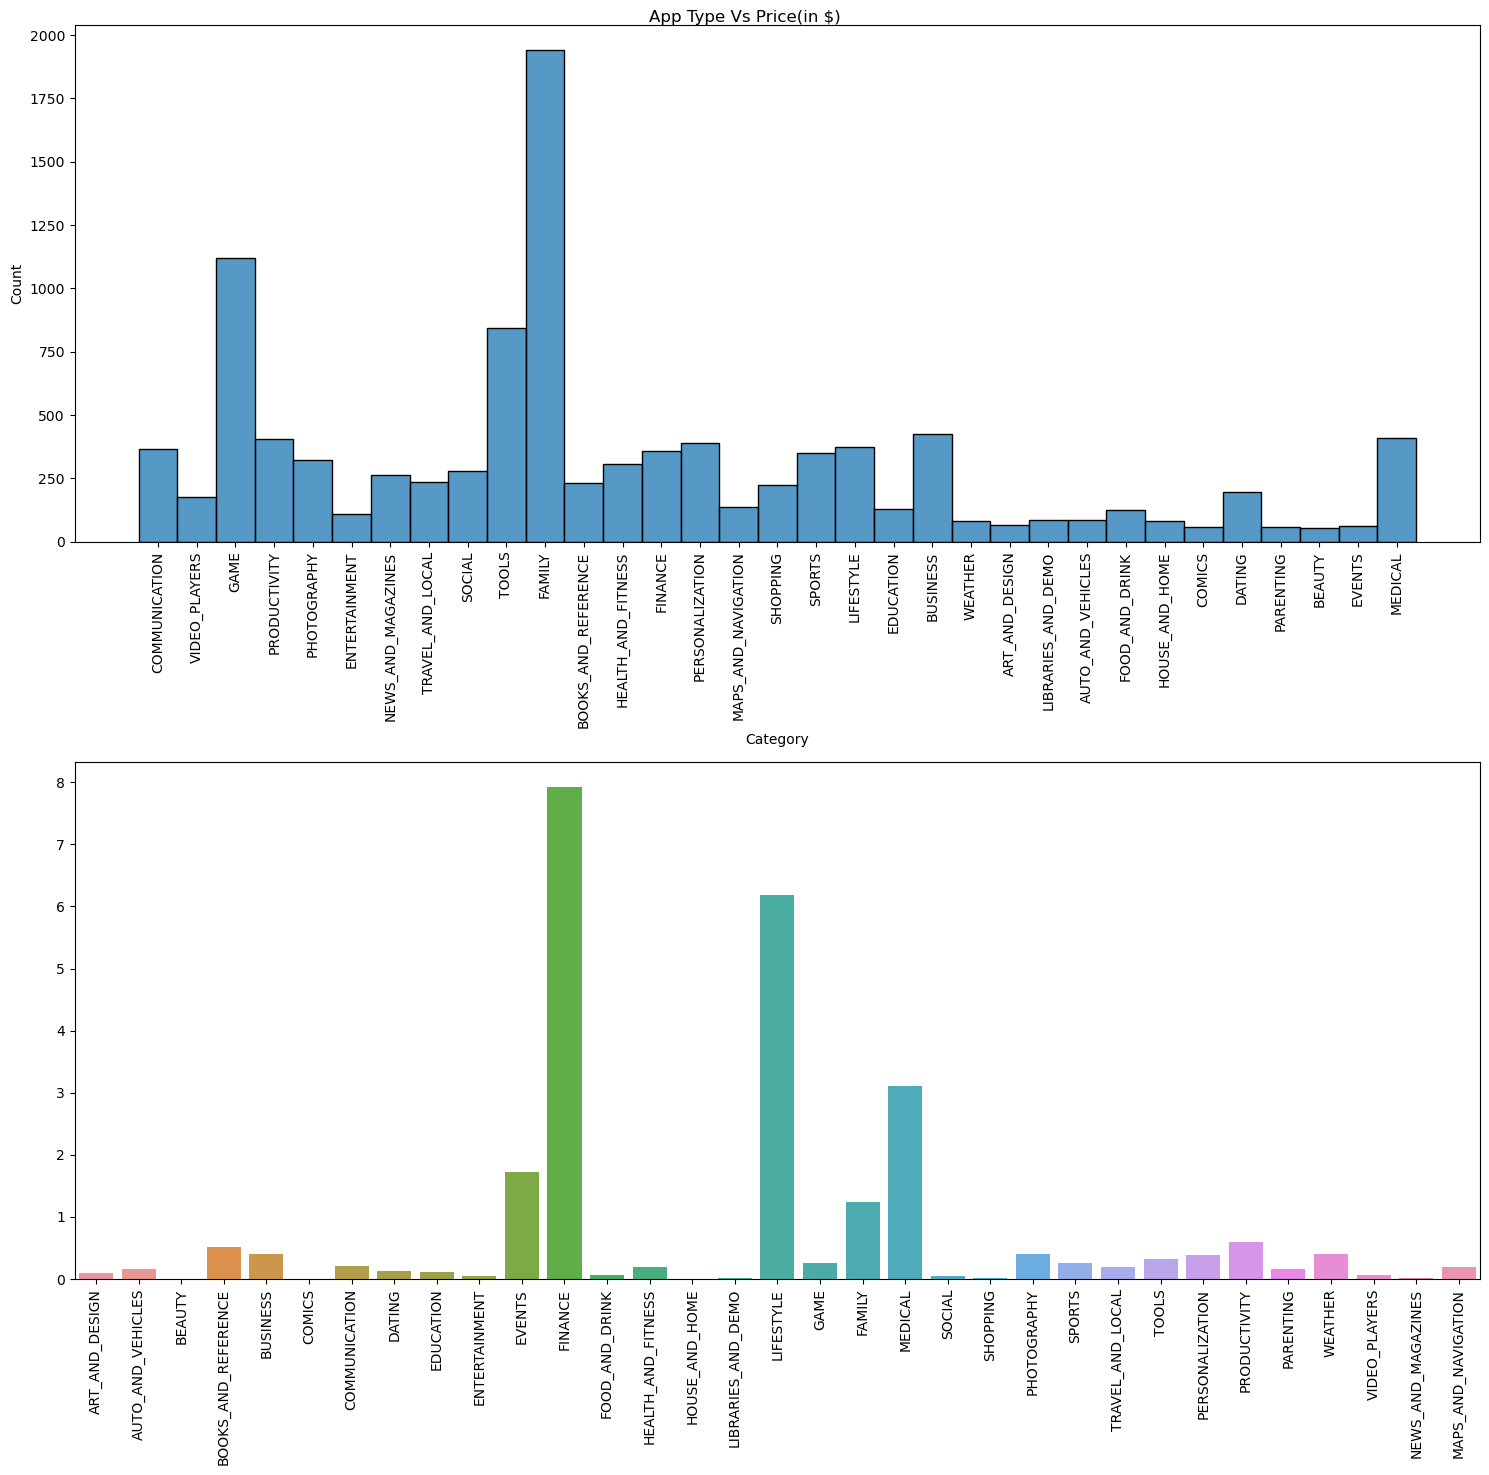

In [145]:
# Creating plot
plt.figure(figsize=(15,15))
plt.suptitle("App Type Vs Price(in $)")
plt.subplot(211)
sns.histplot(data=df_new.Category)
plt.xticks(rotation=90)
plt.subplot(212)
sns.barplot(x=app_type,y=prices,data=df_new )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 14.

In [136]:
df_new = df[~(df["Installs"]=="Free")]
df_new["Installs"] = df_new.Installs.str.replace('+','')
df_new["Installs"] = df_new.Installs.str.replace(',','')
df_new.Installs.dropna(inplace=True)

In [137]:
df_new["Installs"] = df_new.Installs.astype(int)

In [138]:
# Removing Duplicates
df_new.drop_duplicates(inplace=True)

In [139]:
# Sort the original array permanently
df_new.sort_values(by=["Installs"],ascending=False, inplace = True)

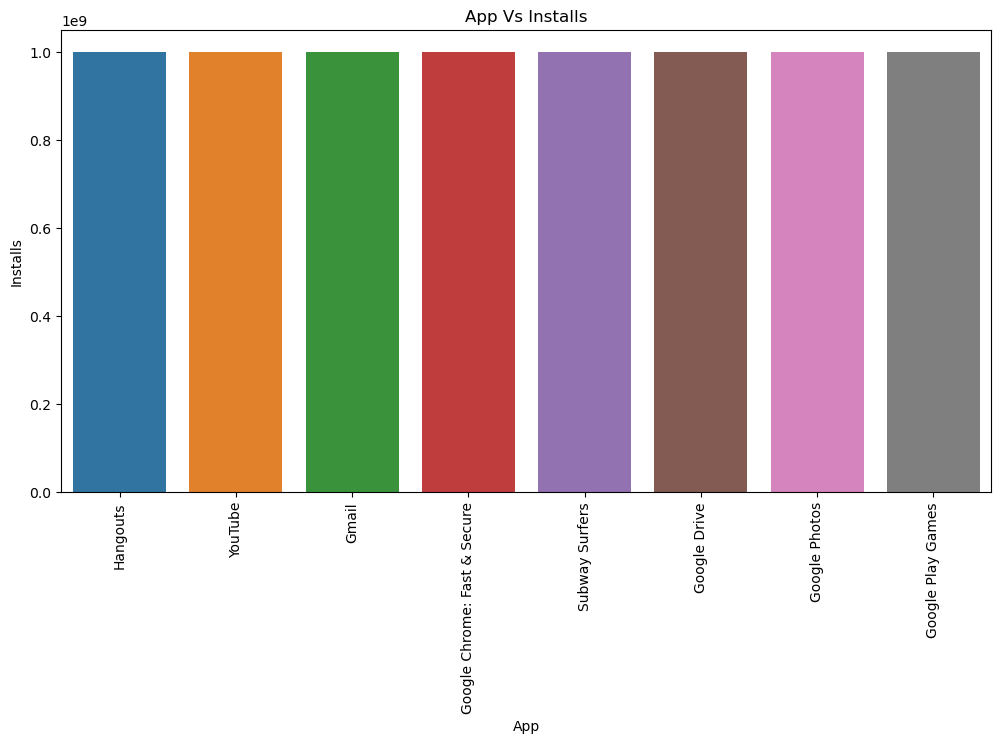

In [140]:
# Creating histogram
plt.figure(figsize=(12,6))
sns.barplot(x='App',y='Installs',data=df_new.head(11))
plt.title("App Vs Installs")
plt.xticks(rotation=90)
plt.show()

From the above histogram, we can say that following are top apps in the dataset:<br>
1. Hangouts
2. Facebook
3. Gmail
4. Google Play Games
5. Google Play Books
6. Subway Surfers
7. Google Drive
8. Whatsapp Messenger
9. Google Photos
10. Instagram

# 15.

To find most popular app categories, I will consider taking the folowing features.<br>
1. Total count of apps in each category
2. Average downloads in each category
3. Average Rating in each category

In [144]:
# Imputing null values with 0
df_new.Rating.fillna(0,inplace=True)

In [150]:
# Grouping data based on category to calculate average price
df_group = df_new.groupby(['Category'])

In [156]:
app_type =['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

ratings = []
installs = []
for typ in app_type:
    ratings.append(df_group.get_group(typ).mean()['Rating'])
    installs.append(df_group.get_group(typ).mean()['Installs'])

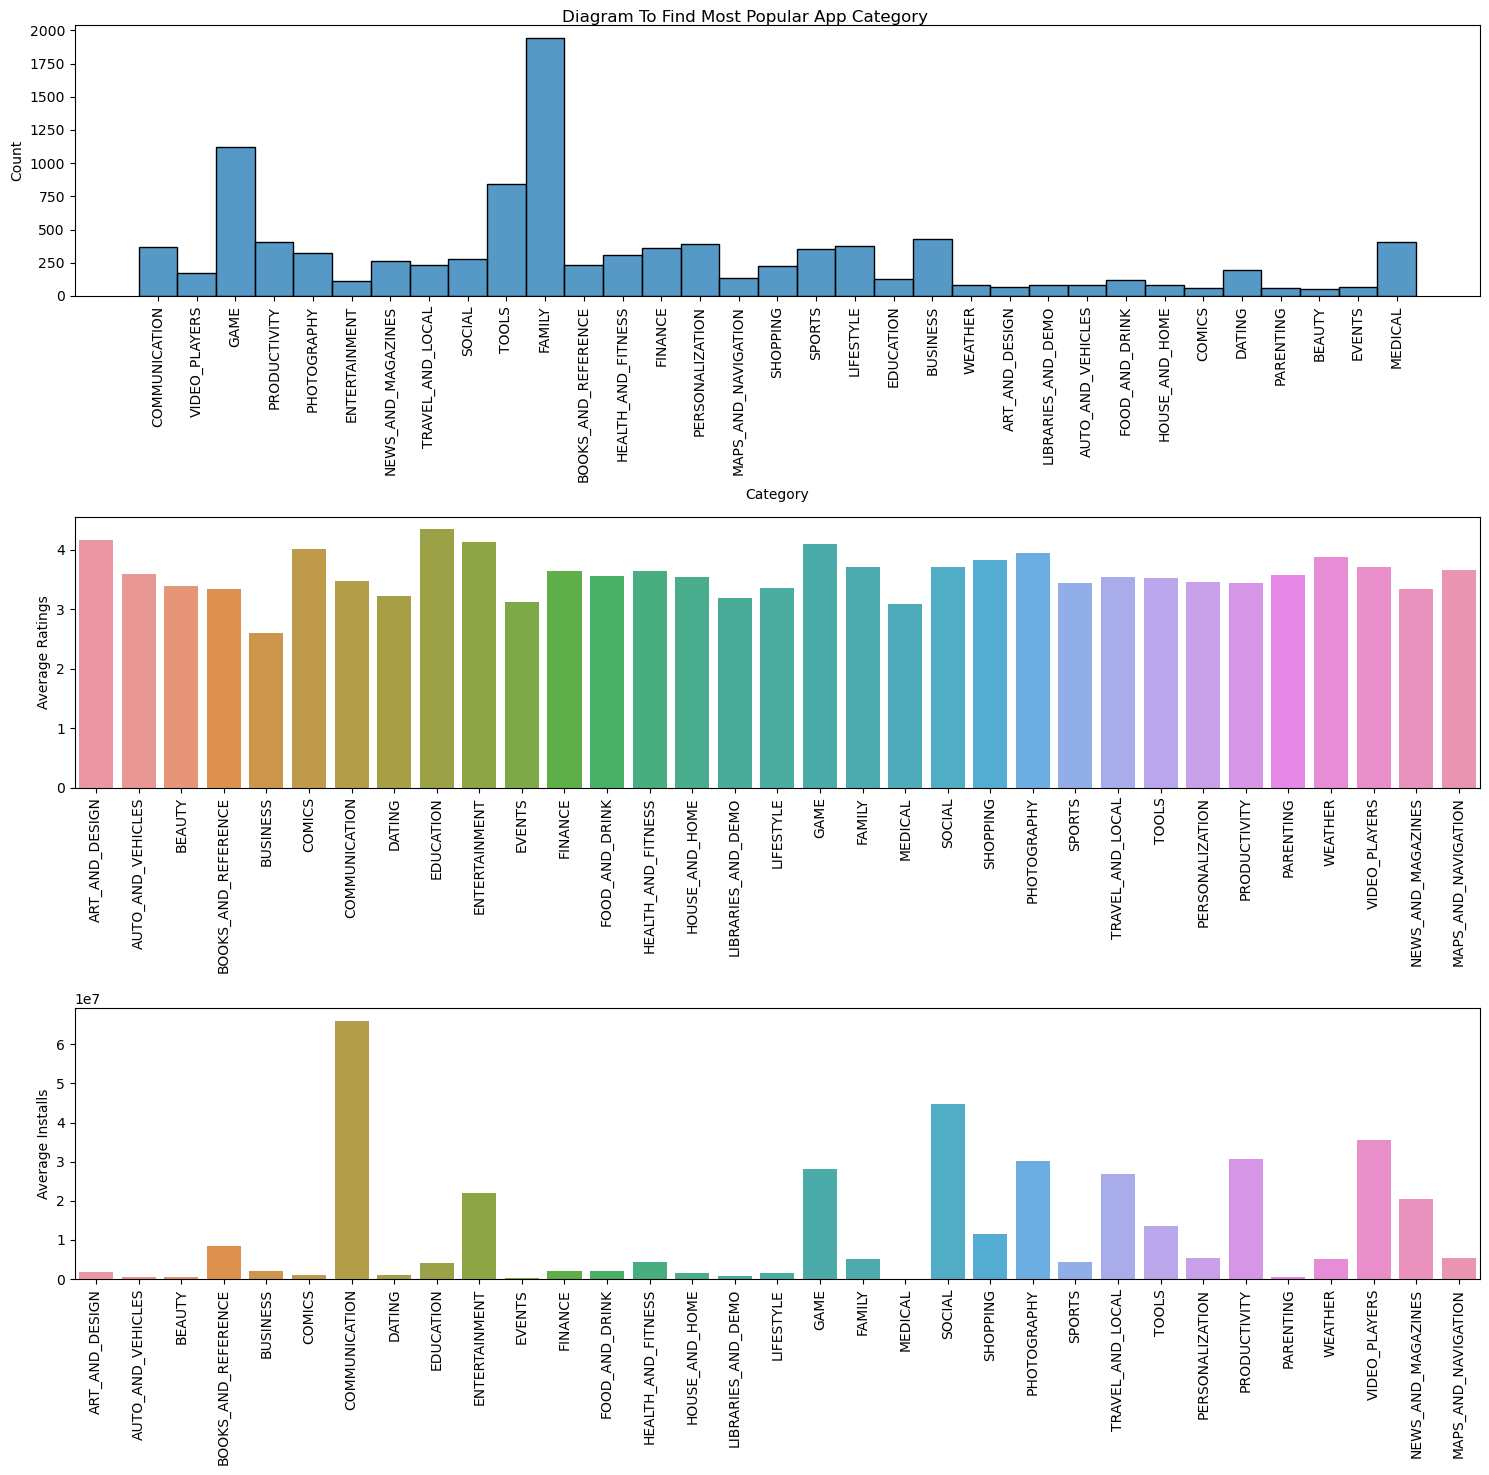

In [157]:
# Creating plot
plt.figure(figsize=(15,15))
plt.suptitle("Diagram To Find Most Popular App Category")
plt.subplot(311)
sns.histplot(data=df_new.Category)
plt.xticks(rotation=90)
plt.subplot(312)
sns.barplot(x=app_type,y=ratings,data=df_new )
plt.ylabel("Average Ratings")
plt.xticks(rotation=90)
plt.subplot(313)
sns.barplot(x=app_type,y=installs,data=df_new )
plt.ylabel("Average Installs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 16.

Data related to app developers is not present in the dataset

# 17.